In [1]:
from collections import defaultdict
import numpy as np
from chempy import Equilibrium, Species
from chempy.equilibria import EqSystem, NumSysLin
from pyneqsys.symbolic import SymbolicSys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
eqw = Equilibrium({'H2O': 1}, {'OH-': 1, 'H+': 1}, 1e-14)
eq1 = Equilibrium({'Fe+3': 1, 'H2O': 1}, {'FeOH+2': 1, 'H+': 1}, 10**-2.774)
eq2 = Equilibrium({'Fe+3': 2, 'H2O': 2}, {'Fe2(OH)2+4': 1, 'H+': 2}, 10**-2.81)
eqsys = EqSystem([eqw, eq1, eq2], 'Fe+3 H2O FeOH+2 H+ Fe2(OH)2+4 OH-', substance_factory=Species.from_formula)
c0 = defaultdict(float, {'H+': 1e-2, 'Fe+3': 7e-3, 'H2O': 1})

In [3]:
numsys = NumSysLin(eqsys)
neqsys = SymbolicSys.from_callback(numsys.f, eqsys.ns, nparams=eqsys.ns + eqsys.nr)
neqsys.exprs

/home/bjorn/vc/chempy/chempy/chemistry.py:471: ChemPyDeprecationWarning: precipitate is deprecated since (not including) 0.3.0, it will be missing in 0.4.0.
  if substances[s_name].precipitate:


[-1 + x_3*x_5/(p_6*x_1),
 -1 + x_2*x_3/(p_7*x_0*x_1),
 -1 + x_3**2*x_4/(p_8*x_0**2*x_1**2),
 -3*p_0 - 2*p_2 - p_3 - 4*p_4 + p_5 + 3*x_0 + 2*x_2 + x_3 + 4*x_4 - x_5,
 -2*p_1 - p_2 - p_3 - 2*p_4 - p_5 + 2*x_1 + x_2 + x_3 + 2*x_4 + x_5,
 -p_1 - p_2 - 2*p_4 - p_5 + x_1 + x_2 + 2*x_4 + x_5,
 -p_0 - p_2 - 2*p_4 + x_0 + x_2 + 2*x_4]

In [4]:
x, info, sane = eqsys.root(c0)
assert sane
eqsys.as_per_substance_dict(x)

/home/bjorn/vc/chempy/chempy/chemistry.py:471: ChemPyDeprecationWarning: precipitate is deprecated since (not including) 0.3.0, it will be missing in 0.4.0.
  if substances[s_name].precipitate:


{'Fe+3': 0.0054937653949203545,
 'Fe2(OH)2+4': 0.00035201768633571644,
 'FeOH+2': 0.00080219923240825331,
 'H+': 0.011506234605947326,
 'H2O': 0.99849376539405255,
 'OH-': 8.6778498752141735e-13}

/home/bjorn/vc/chempy/chempy/chemistry.py:471: ChemPyDeprecationWarning: precipitate is deprecated since (not including) 0.3.0, it will be missing in 0.4.0.
  if substances[s_name].precipitate:


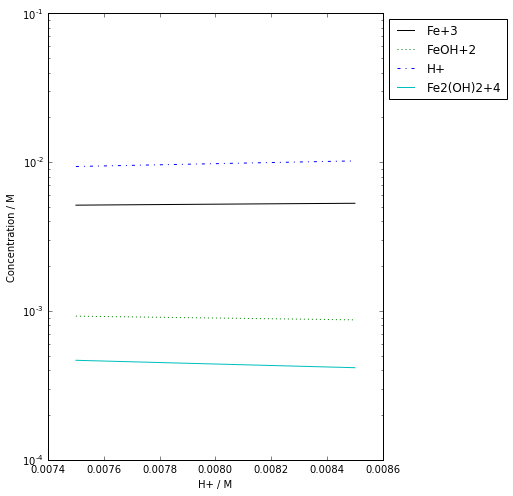

In [5]:
plt.figure(figsize=(8,8))
Cout, info, sanity = eqsys.roots(c0, np.linspace(0.0075, 0.0085), 'H+', plot_kwargs={
        'substances': 'Fe+3 FeOH+2 H+ Fe2(OH)2+4'.split()})
plt.gca().set_xscale('linear')

In [6]:
x, info, sane = eqsys.root(defaultdict(float, {'H+': 8.26165e-3, 'Fe+3': 7e-3, 'H2O': 1}))
sane
eqsys.as_per_substance_dict(x)['Fe2(OH)2+4']*1e3

/home/bjorn/vc/chempy/chempy/chemistry.py:471: ChemPyDeprecationWarning: precipitate is deprecated since (not including) 0.3.0, it will be missing in 0.4.0.
  if substances[s_name].precipitate:


0.42728920521740715